<a href="https://colab.research.google.com/github/JeslinMB/jeslinmb.github.io/blob/main/Cleanliness_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
#required configurations
API_KEY = "4c7cbde2-eeb6-4dbf-b73b-7f1dfc38f717"
DEVICE_ID = "BOLT5914166"
telegram_chat_id = "@temperature_alert_devp123"
telegram_bot_id = "bot6477955203:AAH_sse7jZGXGsW5SqG6GcbFidFftlH3lkc"

time: 815 µs (started: 2023-11-23 12:26:48 +00:00)


In [28]:
!pip install boltiot
from boltiot import Sms, Bolt

time: 6.53 s (started: 2023-11-23 12:27:15 +00:00)


In [29]:
mybolt=Bolt(API_KEY,DEVICE_ID)

time: 481 µs (started: 2023-11-23 12:27:26 +00:00)


In [30]:
#displaying the timetaken for each cell to execute
!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 15.6 s (started: 2023-11-23 12:27:31 +00:00)


In [31]:
!pip install bing-image-downloader   #helps to collect your dataset from bing

time: 15.2 s (started: 2023-11-23 12:28:02 +00:00)


In [3]:
!mkdir cityimages

time: 107 ms (started: 2023-11-23 11:49:52 +00:00)


In [4]:
from bing_image_downloader import downloader
downloader.download("pollution and smoke filled city places",limit=25,output_dir='cityimages',
                    adult_filter_off=True)

[%] Downloading Images to /content/cityimages/pollution and smoke filled city places


[!!]Indexing page: 1

[%] Indexed 25 Images on Page 1.


[%] Downloading Image #1 from https://gcvoters.org/wp-content/uploads/2020/05/sky-pollution-smoke-pair-smog-two-billow-chimneys-smoke-stacks-pollute_t20_6AWbPv.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://i.huffpost.com/gen/1575964/images/o-SMOKE-POLLUTION-facebook.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://get.pxhere.com/photo/pollution-sky-smoke-explosion-industry-factory-cloud-atmosphere-heat-city-architecture-world-reflection-gas-night-evening-1550759.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://wallup.net/wp-content/uploads/2017/03/15/147055-smoke-pollution-cityscape-clouds-dusk.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://static.independent.co.uk/s3fs-public/thumbnails/image/2020/02/25/13/untitled-design-7.jpg?width=982&amp;height=726&amp;auto=webp&amp;qualit

In [5]:
downloader.download("Beautiful Green Places",limit=25,output_dir='cityimages',
                    adult_filter_off=True)

[%] Downloading Images to /content/cityimages/Beautiful Green Places


[!!]Indexing page: 1

[%] Indexed 25 Images on Page 1.


[%] Downloading Image #1 from https://i.pinimg.com/originals/49/7b/fc/497bfcf59dd9c79b75afe944d7875066.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://2.bp.blogspot.com/-tROa8O0L0T0/UzumMdMGX4I/AAAAAAAAAVM/jJ8rEf_ly0U/s1600/beautiful-nature-hd-images-wallpapers-65.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://i.pinimg.com/originals/2e/7f/98/2e7f98dcfb11b1a9c34ad00235b5130d.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://i.pinimg.com/originals/e0/cd/4f/e0cd4f5a1f796f5a19e37040bbef8808.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://www.jetsetter.com/uploads/sites/7/2018/04/9s9_ATCO.jpeg
[%] File Downloaded !

[%] Downloading Image #6 from https://www.wallpapers13.com/wp-content/uploads/2016/10/Beautiful-untouched-nature-Pristine-mountain-river-riverbed-rock-with-green-moss-forest-with-dense-v

In [32]:
#Preprocessing

import os                         # to access the various folders
import matplotlib.pyplot as plt   # to display the images when needed
import numpy as np                # numerical computations
from skimage.io import imread     # to read the images
from skimage.transform import resize  # all images need to be in a uniform size for classification

target=[]
images=[]
flat_data=[]

DATADIR = '/content/cityimages'
CATEGORIES=['pollution and smoke filled city places','Beautiful Green Places']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    #print(img_array.shape)
    #plt.imshow(img_array)
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data=np.array(flat_data)
target=np.array(target)
images=np.array(images)


time: 54.9 s (started: 2023-11-23 12:28:28 +00:00)


In [33]:
len(flat_data[0])

67500

time: 3.35 ms (started: 2023-11-23 12:29:27 +00:00)


In [34]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

time: 3.91 ms (started: 2023-11-23 12:29:31 +00:00)


<BarContainer object of 2 artists>

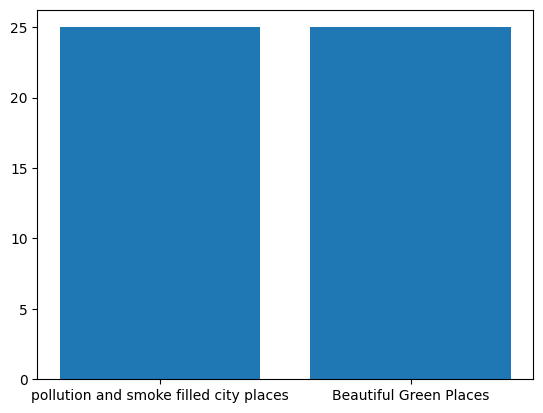

time: 183 ms (started: 2023-11-23 12:29:35 +00:00)


In [35]:
unique,count=np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [36]:
#Split data into training & testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flat_data,target,test_size=0.3,
                                               random_state=109)

time: 8.65 ms (started: 2023-11-23 12:29:40 +00:00)


In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid=[
    {'C':[1,10,100,1000],'kernel':['linear']},
    {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}
 ]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

time: 13.4 s (started: 2023-11-23 12:29:45 +00:00)


In [38]:
y_pred = clf.predict(x_test)
y_pred

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1])

time: 56 ms (started: 2023-11-23 12:30:06 +00:00)


In [39]:
y_test

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1])

time: 3.57 ms (started: 2023-11-23 12:30:10 +00:00)


In [40]:
from sklearn.metrics import accuracy_score,confusion_matrix

time: 529 µs (started: 2023-11-23 12:30:14 +00:00)


In [41]:
accuracy_score(y_pred,y_test)

0.8

time: 4.05 ms (started: 2023-11-23 12:30:16 +00:00)


In [42]:
confusion_matrix(y_pred,y_test)

array([[5, 2],
       [1, 7]])

time: 5.37 ms (started: 2023-11-23 12:30:20 +00:00)


In [43]:
#Save the model using Pickle library
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 30.8 ms (started: 2023-11-23 12:30:25 +00:00)


In [44]:
model = pickle.load(open('img_model.p','rb'))

time: 6.39 ms (started: 2023-11-23 12:30:28 +00:00)


In [45]:
import requests
import json
import time

def send_telegram_message(message):
    """Sends message via Telegram"""
    url = "https://api.telegram.org/" + telegram_bot_id + "/sendMessage"
    data = {
        "chat_id": telegram_chat_id,
        "text": message
    }
    try:
        response = requests.request(
            "POST",
            url,
            params=data
        )
        print("This is the Telegram URL")
        print(url)
        print("This is the Telegram response")
        print(response.text)
        telegram_data = json.loads(response.text)
        return telegram_data["ok"]
    except Exception as e:
        print("An error occurred in sending the alert message via Telegram")
        print(e)
        return False

time: 1.29 ms (started: 2023-11-23 12:30:32 +00:00)


Enter your URLhttps://akm-img-a-in.tosshub.com/indiatoday/images/story/202208/chris-leboutillier-TUJud0AWAPI_2_1200x768.jpeg?VersionId=vVCr2BYg3TlAhQE4P40r5q4yXaSgMAIT&size=690:388
(388, 690, 3)
PREDICTED OUTPUT: pollution and smoke filled city places
{"value": "1", "success": 1}
This is the Telegram URL
https://api.telegram.org/bot6477955203:AAH_sse7jZGXGsW5SqG6GcbFidFftlH3lkc/sendMessage
This is the Telegram response
{"ok":true,"result":{"message_id":17,"sender_chat":{"id":-1002046327500,"title":"Temperature Alert","username":"temperature_alert_devp123","type":"channel"},"chat":{"id":-1002046327500,"title":"Temperature Alert","username":"temperature_alert_devp123","type":"channel"},"date":1700743655,"text":"Not a safe residential area"}}
This is the Telegram status: True


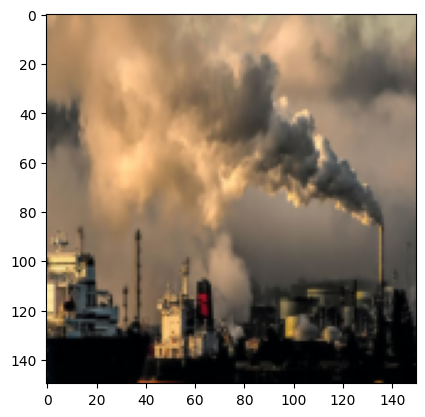

time: 1min 8s (started: 2023-11-23 12:46:47 +00:00)


In [48]:
#Testing a random image
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
result = (f'{y_out}')
print(f'PREDICTED OUTPUT: {y_out}')

if result=='pollution and smoke filled city places':
    buzzer=mybolt.analogWrite('0','6')
    print(buzzer)
    time.sleep(10)
    mybolt.analogWrite('0','0')
    telegram_status = send_telegram_message("Not a safe residential area")
    print("This is the Telegram status:", telegram_status)
    time.sleep(20)

else:
    telegram_status = send_telegram_message("It's a safe residential area")
    print("This is the Telegram status:", telegram_status)
    time.sleep(20)